In [1]:
import re
import matplotlib.pyplot as plt
import session_info
plt.rcParams['figure.dpi'] = 300

In [2]:
session_info.show(html=False)

-----
matplotlib          3.7.4
session_info        1.0.0
-----
IPython             8.4.0
jupyter_client      6.1.12
jupyter_core        4.7.1
notebook            6.4.4
-----
Python 3.8.5 (default, Sep  4 2020, 02:22:02) [Clang 10.0.0 ]
macOS-10.16-x86_64-i386-64bit
-----
Session information updated at 2024-01-14 17:38


In [3]:
def parse_elapsed_time(text):
    """Extracts and converts elapsed time to minutes from a given text."""
    match = re.search(r"Elapsed \(wall clock\) time \(h:mm:ss or m:ss\): (\d+):(\d+\.\d+)", text)
    if match:
        minutes, seconds = map(float, match.groups())
        total_minutes = minutes + seconds / 60
        return round(total_minutes, 2)  # Round to 2 decimal places for precision
    else:
        match = re.search(r"Elapsed \(wall clock\) time \(h:mm:ss or m:ss\): (\d+):(\d+):(\d+)", text)
        if match:
            hours, minutes, seconds = map(float, match.groups())
            total_minutes = hours*60 + minutes + seconds / 60
            return round(total_minutes, 2)  # Round to 2 decimal places for precision
        else:
            return None  # Return None in case of no match

def parse_max_resident_set_size(text):
    """Extracts and converts maximum resident set size to gigabytes from a given text."""
    match = re.search(r"Maximum resident set size \(kbytes\): (\d+)", text)
    if match:
        kbytes = int(match.group(1))
        gigabytes = kbytes / (1000**2)
        return gigabytes
    else:
        return None  # Return None in case of no match



# Human 20K PBMC

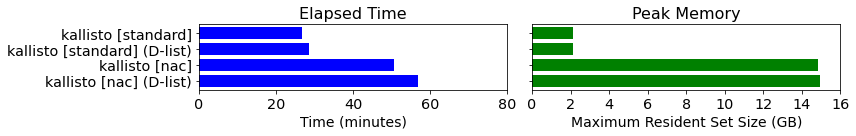

In [4]:
# File names for the y-axis labels
file_names = ["performance_comparisons/16_standard-20kb_PBMC_1.txt",
              "performance_comparisons/16_standard_offlist-20kb_PBMC_1.txt",
              "performance_comparisons/16_nac-20kb_PBMC_1.txt",
              "performance_comparisons/16_nac_offlist-20kb_PBMC_1.txt"]
sample_names = ["kallisto [standard]",
               "kallisto [standard] (D-list)",
               "kallisto [nac]",
               "kallisto [nac] (D-list)"]

file_names.reverse()
sample_names.reverse()

elapsed_times = []
max_resident_sizes = []

# Read each file and parse the data
for file_name in file_names:
    with open(file_name, 'r') as file:
        content = file.read()
        elapsed_time = parse_elapsed_time(content)
        max_res_size = parse_max_resident_set_size(content)
        elapsed_times.append(elapsed_time if elapsed_time is not None else 0)
        max_resident_sizes.append(round(max_res_size,3) if max_res_size is not None else 0)

# Plotting the results with horizontal bars
fig, axes = plt.subplots(1, 2, figsize=(12, 2))

# Elapsed Time Plot - Horizontal
axes[0].barh(sample_names, elapsed_times, color='blue', height=0.75)
axes[0].set_title('Elapsed Time', size=16)
axes[0].set_xlabel('Time (minutes)', size=14)
axes[0].set_xlim(0,80)
axes[0].yaxis.set_tick_params(labelsize='x-large')
axes[0].xaxis.set_tick_params(labelsize='x-large')
axes[0].xaxis.set_ticks([0,20,40,60,80])


# Maximum Resident Set Size Plot - Horizontal
axes[1].barh(sample_names, max_resident_sizes, color='green', height=0.75)
axes[1].set_title('Peak Memory', size=16)
axes[1].set_xlabel('Maximum Resident Set Size (GB)', size=14)
axes[1].set_xlim(0,16)
axes[1].yaxis.set_tick_params(labelleft=False)
axes[1].xaxis.set_tick_params(labelsize='x-large')
axes[1].xaxis.set_ticks([0,2,4,6,8,10,12,14,16])



plt.tight_layout()
plt.show()



# Mouse 10K neuron

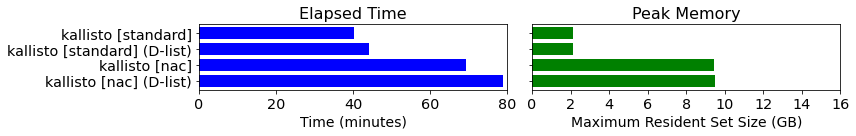

In [5]:
# File names for the y-axis labels
file_names = ["performance_comparisons/16_standard-10kb_neuron_1.txt",
              "performance_comparisons/16_standard_offlist-10kb_neuron_1.txt",
              "performance_comparisons/16_nac-10kb_neuron_1.txt",
              "performance_comparisons/16_nac_offlist-10kb_neuron_1.txt"]
sample_names = ["kallisto [standard]",
               "kallisto [standard] (D-list)",
               "kallisto [nac]",
               "kallisto [nac] (D-list)"]

file_names.reverse()
sample_names.reverse()

elapsed_times = []
max_resident_sizes = []

# Read each file and parse the data
for file_name in file_names:
    with open(file_name, 'r') as file:
        content = file.read()
        elapsed_time = parse_elapsed_time(content)
        max_res_size = parse_max_resident_set_size(content)
        elapsed_times.append(elapsed_time if elapsed_time is not None else 0)
        max_resident_sizes.append(round(max_res_size,3) if max_res_size is not None else 0)

# Plotting the results with horizontal bars
fig, axes = plt.subplots(1, 2, figsize=(12, 2))

# Elapsed Time Plot - Horizontal
axes[0].barh(sample_names, elapsed_times, color='blue', height=0.75)
axes[0].set_title('Elapsed Time', size=16)
axes[0].set_xlabel('Time (minutes)', size=14)
axes[0].set_xlim(0,80)
axes[0].yaxis.set_tick_params(labelsize='x-large')
axes[0].xaxis.set_tick_params(labelsize='x-large')
axes[0].xaxis.set_ticks([0,20,40,60,80])


# Maximum Resident Set Size Plot - Horizontal
axes[1].barh(sample_names, max_resident_sizes, color='green', height=0.75)
axes[1].set_title('Peak Memory', size=16)
axes[1].set_xlabel('Maximum Resident Set Size (GB)', size=14)
axes[1].set_xlim(0,16)
axes[1].yaxis.set_tick_params(labelleft=False)
axes[1].xaxis.set_tick_params(labelsize='x-large')
axes[1].xaxis.set_ticks([0,2,4,6,8,10,12,14,16])



plt.tight_layout()
plt.show()



# Mouse 5K lung

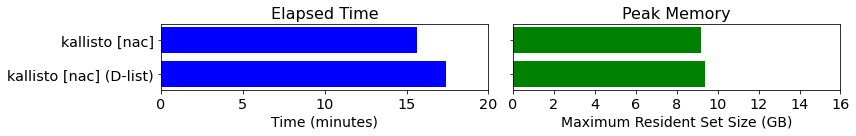

In [6]:
# File names for the y-axis labels
file_names = ["performance_comparisons/16_nac-5kb_lung_1.txt",
              "performance_comparisons/16_nac_offlist-5kb_lung_1.txt"]
sample_names = ["kallisto [nac]",
               "kallisto [nac] (D-list)"]

file_names.reverse()
sample_names.reverse()

elapsed_times = []
max_resident_sizes = []

# Read each file and parse the data
for file_name in file_names:
    with open(file_name, 'r') as file:
        content = file.read()
        elapsed_time = parse_elapsed_time(content)
        max_res_size = parse_max_resident_set_size(content)
        elapsed_times.append(elapsed_time if elapsed_time is not None else 0)
        max_resident_sizes.append(round(max_res_size,3) if max_res_size is not None else 0)

# Plotting the results with horizontal bars
fig, axes = plt.subplots(1, 2, figsize=(12, 2))

# Elapsed Time Plot - Horizontal
axes[0].barh(sample_names, elapsed_times, color='blue', height=0.75)
axes[0].set_title('Elapsed Time', size=16)
axes[0].set_xlabel('Time (minutes)', size=14)
axes[0].set_xlim(0,20)
axes[0].yaxis.set_tick_params(labelsize='x-large')
axes[0].xaxis.set_tick_params(labelsize='x-large')
axes[0].xaxis.set_ticks([0,5,10,15,20])


# Maximum Resident Set Size Plot - Horizontal
axes[1].barh(sample_names, max_resident_sizes, color='green', height=0.75)
axes[1].set_title('Peak Memory', size=16)
axes[1].set_xlabel('Maximum Resident Set Size (GB)', size=14)
axes[1].set_xlim(0,16)
axes[1].yaxis.set_tick_params(labelleft=False)
axes[1].xaxis.set_tick_params(labelsize='x-large')
axes[1].xaxis.set_ticks([0,2,4,6,8,10,12,14,16])

plt.tight_layout()
plt.show()


# Human 5K Jejunum

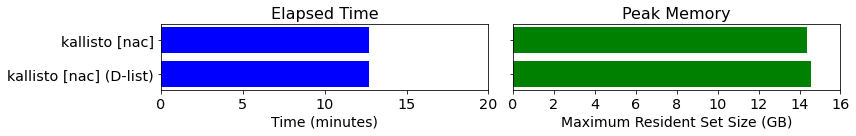

In [7]:
# File names for the y-axis labels
file_names = ["performance_comparisons/16_nac-5kb_jejunum_1.txt",
              "performance_comparisons/16_nac_offlist-5kb_jejunum_1.txt"]
sample_names = ["kallisto [nac]",
               "kallisto [nac] (D-list)"]

file_names.reverse()
sample_names.reverse()

elapsed_times = []
max_resident_sizes = []

# Read each file and parse the data
for file_name in file_names:
    with open(file_name, 'r') as file:
        content = file.read()
        elapsed_time = parse_elapsed_time(content)
        max_res_size = parse_max_resident_set_size(content)
        elapsed_times.append(elapsed_time if elapsed_time is not None else 0)
        max_resident_sizes.append(round(max_res_size,3) if max_res_size is not None else 0)

# Plotting the results with horizontal bars
fig, axes = plt.subplots(1, 2, figsize=(12, 2))

# Elapsed Time Plot - Horizontal
axes[0].barh(sample_names, elapsed_times, color='blue', height=0.75)
axes[0].set_title('Elapsed Time', size=16)
axes[0].set_xlabel('Time (minutes)', size=14)
axes[0].set_xlim(0,20)
axes[0].yaxis.set_tick_params(labelsize='x-large')
axes[0].xaxis.set_tick_params(labelsize='x-large')
axes[0].xaxis.set_ticks([0,5,10,15,20])


# Maximum Resident Set Size Plot - Horizontal
axes[1].barh(sample_names, max_resident_sizes, color='green', height=0.75)
axes[1].set_title('Peak Memory', size=16)
axes[1].set_xlabel('Maximum Resident Set Size (GB)', size=14)
axes[1].set_xlim(0,16)
axes[1].yaxis.set_tick_params(labelleft=False)
axes[1].xaxis.set_tick_params(labelsize='x-large')
axes[1].xaxis.set_ticks([0,2,4,6,8,10,12,14,16])

plt.tight_layout()
plt.show()
